In [28]:
import pandas as pd
import dabest
df = pd.read_csv('patch_celltype.csv', index_col = 0)
#print mean and std of IN and EX
dfin = df[df['cell_type']=='IN']
dfex = df[df['cell_type']=='EX']
print('IN:\n',dfin.describe(),'\n','-_'*50)
print('EX:\n',dfex.describe())
df.head()

IN:
               gw  enlargements      Vrest       Mohm(v)  Mohm(current)
count  11.000000     11.000000   9.000000     10.000000      10.000000
mean   20.545455      1.318182 -26.488398   6530.131577    6926.418700
std     2.114882      1.965613  17.235640   5162.766481    6218.308976
min    18.000000     -1.500000 -62.897999   1659.269092    1150.335000
25%    19.000000      0.500000 -35.320744   2782.637758    2270.501000
50%    20.000000      1.000000 -18.570292   4544.305136    4873.295000
75%    23.000000      1.000000 -15.119467   9332.218676    8523.115000
max    23.000000      5.000000  -7.413364  17059.460750   18670.220000 
 -_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
EX:
               gw  enlargements      Vrest       Mohm(v)  Mohm(current)
count  16.000000     15.000000  16.000000     16.000000      15.000000
mean   21.125000      0.366667 -26.478344   4714.155724    6281.230267
std     2.061553      1.619818  13.

,location,gw,potential type,Morphology,"if, radial",polarity,branch,enlargements,Vrest,Mohm(v),Mohm(current),cell_type
c8,slice3,18.0,interneuons,radial,NaN,bi,no,1.0,NaN,2936.650574,3232.790,IN
c9,slice4,18.0,interneuons,tan,NaN,uni,bitufted,1.0,NaN,NaN,NaN,IN
c13,slice4,18.0,CR,NaN,NaN,NaN,NaN,NaN,-28.068893,2786.664140,5740.120,EX
c14,slice4,18.0,interneuons,tan,NaN,bi,no,5.0,-36.843517,7768.438389,1150.335,IN
c15,slice4,18.0,interneuons,tan,NaN,bi,bitufted,1.0,-41.402317,2534.613313,NaN,EX


In [79]:
dfvrest = pd.DataFrame()
dfvrest1 = pd.DataFrame()
dfvrest2 = pd.DataFrame()
# dfvrest['EX']=
dfvrest1['EX']=df[df['cell_type']=='EX']['Vrest'][:]
dfvrest2['IN']=df[df['cell_type']=='IN']['Vrest'][:]
dfvrest = dfvrest1.append(dfvrest2, ignore_index=True)
dfvrest

two_groups = dabest.load(dfvrest, idx=("EX", "IN"),paired=False)

In [80]:
two_groups.mean_diff

DABEST v0.3.0
             
Good evening!
The current time is Wed Jun 10 12:26:31 2020.

The unpaired mean difference between EX and IN is -0.0101 [95%CI -14.2, 10.6].
The p-value of the two-sided permutation t-test is 1.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [81]:
two_groups.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,EX,IN,16,9,mean difference,False,-0.010054,95,-14.245293,10.641238,0.9996,0.998814,0.001514,0.998713,0.00163,0.671125,64.0


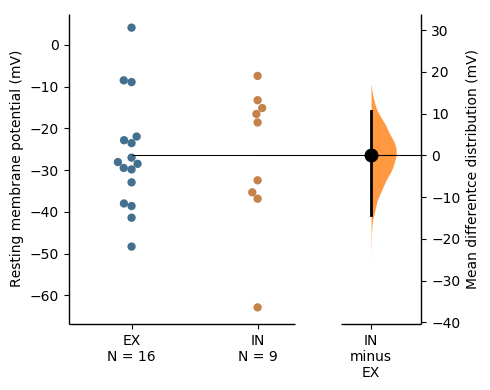

In [88]:
import matplotlib.pyplot as plt
two_groups.mean_diff.plot(swarm_label="Resting membrane potential (mV)",contrast_label="Mean differentce distribution (mV)")
plt.savefig('VrestDiff_estimation.png')

In [96]:
dfmohm = pd.DataFrame()
dfmohm1 = pd.DataFrame()
dfmohm2 = pd.DataFrame()
# dfvrest['EX']=
dfmohm1['EX']=df[df['cell_type']=='EX']['Mohm(v)']
dfmohm2['IN']=df[df['cell_type']=='IN']['Mohm(v)']
dfmohm = dfmohm1.append(dfmohm2, ignore_index=True)


two_groups = dabest.load(dfmohm, idx=("EX", "IN"),paired=False)


In [97]:
two_groups.mean_diff

DABEST v0.3.0
             
Good evening!
The current time is Wed Jun 10 12:40:29 2020.

The unpaired mean difference between EX and IN is 1.82e+03 [95%CI -1.2e+03, 5.85e+03].
The p-value of the two-sided permutation t-test is 0.314. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported are the likelihood(s) of observing the effect size(s),
if the null hypothesis of zero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [99]:
two_groups.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,EX,IN,16,10,mean difference,False,1815.975853,95,-1198.468795,5853.181169,0.3136,0.349196,-0.966673,0.307046,-1.04365,0.476767,66.0


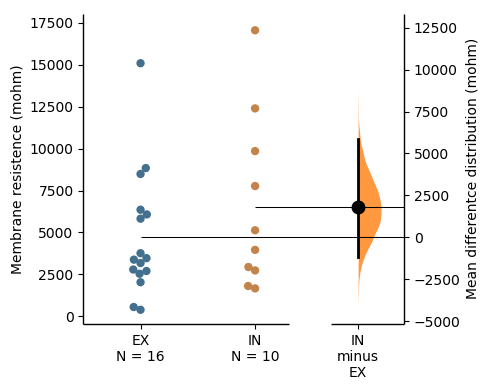

In [98]:
two_groups.mean_diff.plot(swarm_label="Membrane resistence (mohm)",contrast_label="Mean differentce distribution (mohm)")
plt.savefig('mohmDiff_estimation.png')